# UTSA CS 3793/5233: Assignment-4

Summer 2020


**Last Name - First Name - (abc123)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natrual Language Processing - Recurrent Neural Network (Optional - Extra Credit)


## Description

The goal of the assignment is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [61]:
# import all required libraries
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras # ? what is
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow_datasets as tfds # where we load file to?
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.datasets import reuters
from keras.layers import Dense
from keras.layers import LSTM

# Load/Prepare Data

(35 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [3]:
# Load the data - training as well as testing
# splits out the train/test data, batchSize = -1 returns Tensor objects
x_train, y_train = tfds.as_numpy(tfds.load('cifar100', as_supervised = True, split = 'train', batch_size = -1))
x_test, y_test = tfds.as_numpy(tfds.load('cifar100', as_supervised = True, split = 'test', batch_size = -1))
# SHAPE OF DATA: x_train, x_test = (50000, 32, 32, 3), (10000, 32, 32, 3); y_train, y_test = (50000), (10000)

# Prepare the data that can be used by the next step - creating and training the DL model
x_train, x_test = x_train / 255.0, x_test / 255.0 # This rescales the data to values between 0 and 1

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']

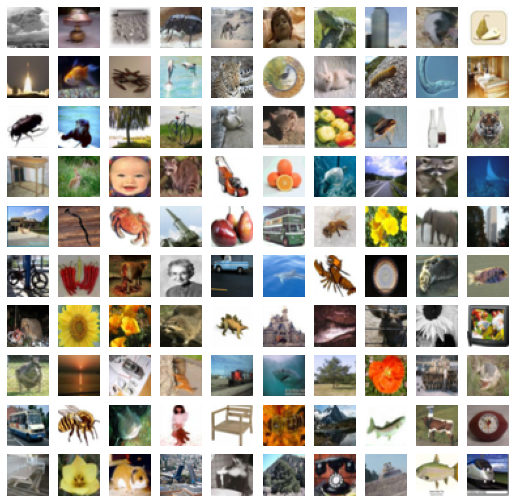

In [4]:
# Visualize the data by plotting 100 rndom images, one each for the 100 classes
%matplotlib inline
fig = plt.figure(figsize = (9, 9))
rows, columns = 10, 10

for image in range(1, rows * columns + 1):
  img = x_train[image, :, :]
  fig.add_subplot(rows, columns, image) # (10 x 10, subplotIndex)
  plt.axis('off')
  plt.imshow(img)
plt.show()

# CNN Model Creation

(35 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [5]:
# Create a DL model for Computer Vision - Convolutional Neural 
# Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
cnn_model = keras.Sequential([
                              keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
                              keras.layers.MaxPooling2D(2, 2), 
                              keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
                              keras.layers.MaxPooling2D(2, 2),
                              keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                              keras.layers.MaxPooling2D(2, 2),

                              keras.layers.Flatten(), # Flatten converts image to sequence of pixels
                              keras.layers.Dense(256, activation = 'relu'), 
                              keras.layers.Dense(128, activation = 'relu'), 
                              keras.layers.Dense(100, activation = 'softmax') # We get 100 outputs
                              ])

cnn_model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics = ['accuracy']
    )

In [6]:
# Print the DL model summary
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

# Training

(35 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [7]:
# Train/fit the DL model using the training CIFAR-100 data
history = cnn_model.fit(x_train, y_train, epochs = 20, validation_split = 0.2, batch_size=50)


Epoch 1/20
800/800 [==============================] - 57s 71ms/step - loss: 4.1101 - accuracy: 0.0678 - val_loss: 3.6840 - val_accuracy: 0.1312
Epoch 2/20
800/800 [==============================] - 58s 73ms/step - loss: 3.4556 - accuracy: 0.1683 - val_loss: 3.3329 - val_accuracy: 0.1912
Epoch 3/20
800/800 [==============================] - 57s 71ms/step - loss: 3.0936 - accuracy: 0.2363 - val_loss: 3.0719 - val_accuracy: 0.2409
Epoch 4/20
800/800 [==============================] - 57s 71ms/step - loss: 2.8496 - accuracy: 0.2827 - val_loss: 2.8876 - val_accuracy: 0.2856
Epoch 5/20
800/800 [==============================] - 56s 70ms/step - loss: 2.6584 - accuracy: 0.3233 - val_loss: 2.8281 - val_accuracy: 0.2966
Epoch 6/20
800/800 [==============================] - 55s 69ms/step - loss: 2.5126 - accuracy: 0.3482 - val_loss: 2.7235 - val_accuracy: 0.3205
Epoch 7/20
800/800 [==============================] - 55s 69ms/step - loss: 2.3657 - accuracy: 0.3823 - val_loss: 2.7210 - val_accuracy:

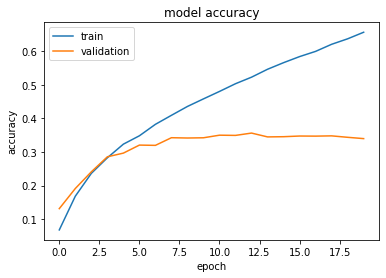

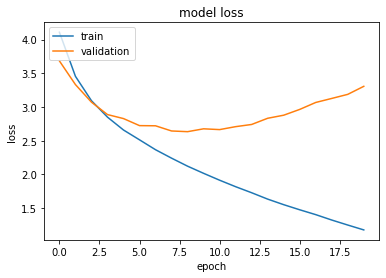

In [23]:
# Plot the training/validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
# Save the trained model weights in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase
cnn_model.save_weights("/content/drive/My Drive/Colab Notebooks/cifar/")

# Testing/Evaluation

(35 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model. 

In [38]:
# Re-initialize the model
model = tf.keras.models.Sequential([
                                    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
                                    keras.layers.MaxPooling2D(2, 2), 
                                    keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
                                    keras.layers.MaxPooling2D(2, 2),
                                    keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    keras.layers.MaxPooling2D(2, 2),

                                    keras.layers.Flatten(), # Flatten converts image to sequence of pixels
                                    keras.layers.Dense(256, activation = 'relu'), 
                                    keras.layers.Dense(128, activation = 'relu'), 
                                    keras.layers.Dense(100, activation = 'softmax') # We get 100 outputs
                                    ])

model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics = ['accuracy']
    )

In [39]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
model.load_weights("/content/drive/My Drive/Colab Notebooks/cifar/")

In [41]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
loss, accuracy = model.evaluate(x_test, y_test, verbose = 2)

313/313 - 4s - loss: 3.2414 - accuracy: 0.3555


# Model Performance - Accuracy

(10 points)

For the models submitted, we will look at the accuracy values on the test data. Credit will be allocated based on how the performance is for your model. The submission with the highest accuracy value will get the highest credit and the one with the lowest accuracy value will get the lowest credit.

# Extra Credit Task - NLP / RNN

The extra credit task is very similar to the required task above. The only change is that the task is not from Computer Vision domain and instead it is from the Natural Language Processing domain. Almost all of the code above can be copied and used in this task. 

## Description

The goal of the extra credit task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following: 

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [68]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words = max_features)

In [69]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

# conerts image to binary class matrix
one_hot_train_labels = keras.utils.to_categorical(y_train)
one_hot_test_labels = keras.utils.to_categorical(y_test) 

# train test
partial_x_train = input_train
partial_y_train = one_hot_train_labels

# train test
x_test = input_test
y_test = one_hot_test_labels


## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [70]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
rnn_model = keras.Sequential([
                              keras.layers.Embedding(max_features, 100), 
                              keras.layers.SimpleRNN(32, return_sequences = True), 
                              keras.layers.SimpleRNN(32, return_sequences = True), 
                              keras.layers.SimpleRNN(32, return_sequences = True), 
                              keras.layers.LSTM(32), 
                              keras.layers.Dropout(0.5), 
                              keras.layers.Dense(46, activation = 'softmax')
                              ])

rnn_model.compile(
    optimizer = 'rmsprop', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [71]:
# Print the DL model summary
print(rnn_model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          4256      
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 46)              

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [72]:
# Train/fit the DL model using the training Reuters data
history = rnn_model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=128, validation_split = 0.2)

Epoch 1/20
57/57 [==============================] - 46s 799ms/step - loss: 2.7848 - accuracy: 0.4141 - val_loss: 2.1818 - val_accuracy: 0.4942
Epoch 2/20
57/57 [==============================] - 47s 821ms/step - loss: 2.2297 - accuracy: 0.4792 - val_loss: 2.0609 - val_accuracy: 0.5058
Epoch 3/20
57/57 [==============================] - 47s 827ms/step - loss: 2.0495 - accuracy: 0.5001 - val_loss: 1.8537 - val_accuracy: 0.5131
Epoch 4/20
57/57 [==============================] - 47s 820ms/step - loss: 1.8205 - accuracy: 0.5308 - val_loss: 1.9652 - val_accuracy: 0.5209
Epoch 5/20
57/57 [==============================] - 48s 836ms/step - loss: 1.6820 - accuracy: 0.5578 - val_loss: 1.7985 - val_accuracy: 0.5298
Epoch 6/20
57/57 [==============================] - 48s 841ms/step - loss: 1.5518 - accuracy: 0.5756 - val_loss: 1.7419 - val_accuracy: 0.5509
Epoch 7/20
57/57 [==============================] - 48s 835ms/step - loss: 1.4611 - accuracy: 0.5882 - val_loss: 1.7467 - val_accuracy: 0.5626

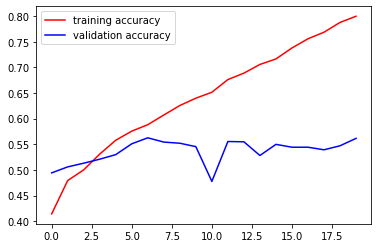

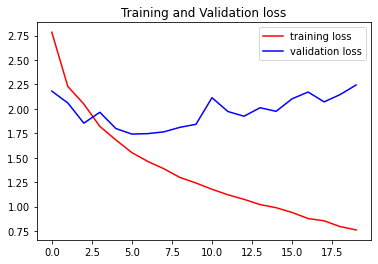

In [76]:
# Plot the training/validation accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r-', label = 'training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r-', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [77]:
# Save the trained model weights in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/", to be used for the testing phase
rnn_model.save_weights("/content/drive/My Drive/Colab Notebooks/reuters/")

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model.

In [78]:
# Re-initialize the model
model2 = keras.Sequential([
                              keras.layers.Embedding(max_features, 100), 
                              keras.layers.SimpleRNN(32, return_sequences = True), 
                              keras.layers.SimpleRNN(32, return_sequences = True), 
                              keras.layers.SimpleRNN(32, return_sequences = True), 
                              keras.layers.LSTM(32), 
                              keras.layers.Dropout(0.5), 
                              keras.layers.Dense(46, activation = 'softmax')
                              ])

model2.compile(
    optimizer = 'rmsprop', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)


In [79]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
model2.load_weights("/content/drive/My Drive/Colab Notebooks/reuters/")

In [80]:
# Evaluate the trained DL model on the Reuters test dataset
loss, accuracy = model2.evaluate(x_test, y_test, verbose = 2)

71/71 - 7s - loss: 2.2963 - accuracy: 0.5610


# Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folder "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) 
4.   If submitting the extra credit work for the NLP task, also download and zip the folder "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip) 
5.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   (35 points) Load/Prepare Data
*   (35 points) CNN Model Creation
*   (35 points) Training
*   (35 points) Testing/Evaluation
*   (10 points) Model Performance - Accuracy
*   (60 points) Extra Credit Task - NLP / RNN



<h2>Works Cited</h2>
<a href = 'https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645#46616645'> Printing 10x10 of images
</a>


